In [22]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [23]:
# Read from csv 
drug_related_deaths_df = pd.read_csv('../Datasets/Accidental_Drug_Related_Deaths_2012-2018.csv')

### Data Cleanup

In [24]:
# Removing unnecessary columns
narrowed_df = drug_related_deaths_df.loc[:,['ID','Date','Age','Sex','Race','DeathCity','DeathCityGeo','COD','Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']]

# Drop records without Age, Sex and Race entry
narrowed_df = narrowed_df.dropna(subset=['Age', 'Sex','Race'], how='all')

# Fill NaN values by N
narrowed_df.update(narrowed_df[['Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']].fillna('N'))

# Convert date column to Datetime object
narrowed_df['Date'] = pd.to_datetime(narrowed_df['Date'])
narrowed_df

narrowed_df.to_csv('../Datasets/Reduced_DataSet.csv')

In [25]:
narrowed_df.head()

,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
1,13-0102,2013-03-21,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,Y,...,N,N,N,N,N,N,N,N,N,N
2,16-0165,2016-03-13,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,Y,...,N,N,N,N,N,N,N,N,N,Y
3,16-0208,2016-03-31,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,Y
4,13-0052,2013-02-13,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N
5,14-0277,2014-06-29,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,N


### Kensuke - Top 3 Drugs Contributing to Accidental Death

In [26]:
narrowed2_df = narrowed_df.copy()
narrowed3_df = narrowed_df.copy() 

In [27]:
drugnames = list(narrowed2_df.columns[9:23])
# Declaring an empty list
totalvalue = []

In [28]:
# This loop will pick the drug column name and iterates through dat frame. 
# The summation counter increments if the value of each cell is not N. 
for drug in drugnames:
    counter = 0
    for index , value in narrowed2_df.iterrows():
        if(narrowed2_df.at[index,drug] != 'N'):
            counter = counter + 1
    totalvalue.append(counter)

([<matplotlib.axis.XTick at 0x12edcd0d0>,
 <a list of 14 Text xticklabel objects>)

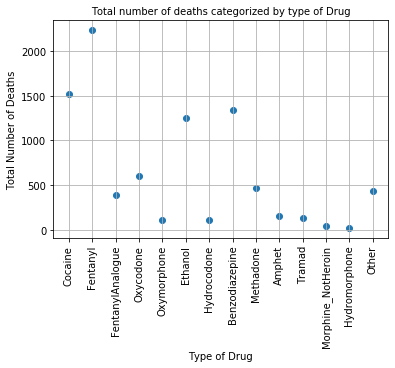

In [29]:
# Plotting the results on a scatter plot. 
plt.scatter(drugnames,totalvalue)
plt.xlabel('Type of Drug',fontsize = 10)
plt.ylabel('Total Number of Deaths',fontsize = 10)
plt.title('Total number of deaths categorized by type of Drug', fontsize = 10)
plt.grid(True)
plt.xticks(drugnames, drugnames, rotation='vertical')


### Prerak - Drug Related Deaths - Seasonal Impact

In [30]:
# Get count of deaths in each month
narrowed_df.index = pd.to_datetime(narrowed_df['Date'],format='%m/%d/%y %I:%M%p')
deaths_by_year_month_df = narrowed_df.groupby(by=[narrowed_df.index.year,narrowed_df.index.month]).agg({'ID':'count'})

In [31]:
# Create new dataframe with year,month and day concatenated
deaths_per_months_df = pd.DataFrame(columns=['Month', 'Deaths Per Month'])
for index, row in deaths_by_year_month_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    deaths_per_months_df = deaths_per_months_df.append({'Month': converted_date, 'Deaths Per Month': count}, ignore_index=True)  

In [32]:
# Set index as month to plot Deaths per month chart
deaths_per_months_df.set_index('Month', inplace=True)
deaths_per_months_df.head()

,Deaths Per Month
Month,
2012-01-01,31
2012-02-01,27
2012-03-01,24
2012-04-01,30
2012-05-01,28


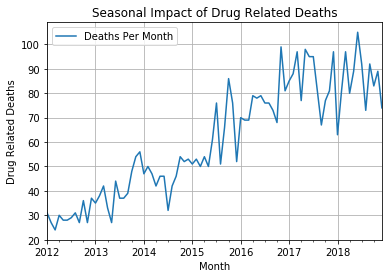

In [33]:
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

deaths_per_months_df[(start_date <= deaths_per_months_df.index) & (deaths_per_months_df.index <= end_date)].plot(grid='on')
plt.title('Seasonal Impact of Drug Related Deaths')
plt.ylabel('Drug Related Deaths')
plt.savefig('../Accidental-Drug-Related-Deaths/Images/Deaths_Per_season.png')

In [45]:
# decomposition = sm.tsa.seasonal_decompose(deaths_per_months_df,model='additive')
# fig = decomposition.plot()
# plt.savefig('../Accidental-Drug-Related-Deaths/Images/Deaths_Per_season_time_series.png')

### Loretta - Relation of age, gender and race on drug related deaths

In [35]:
grouped_gender_df = narrowed_df.groupby(["Sex"]).agg({'ID':'count'})
grouped_gender_df.head()

,ID
Sex,
Female,1325
Male,3773
Unknown,1


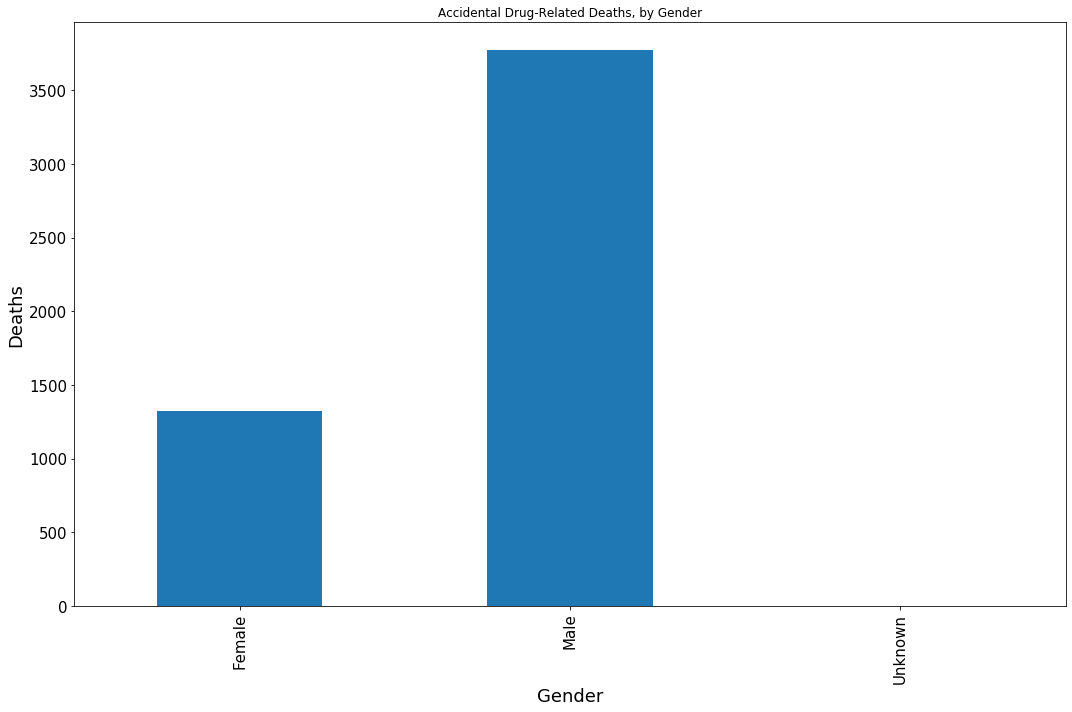

In [37]:
# Graph of Accidental Drug-related Deaths by Sex
ax = grouped_gender_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Gender", figsize=(15, 10), legend=False, fontsize=15)
plt.xlabel("Gender", fontsize=18)
plt.ylabel("Deaths", fontsize=18)
plt.tight_layout()
plt.show()

In [38]:
# Accidental Drug-related deaths by Race
grouped_race_df = narrowed_df.groupby(["Race"]).agg({'ID':'count'})
grouped_race_df.head(15)

,ID
Race,
Asian Indian,14
"Asian, Other",18
Black,433
Chinese,2
Hawaiian,1
"Hispanic, Black",24
"Hispanic, White",561
"Native American, Other",1
Other,11


In [39]:
# Combine some of the Race values

narrowed_df["Race"].replace({"Asian Indian": "Asian", "Asian, Other": "Asian", "Unknown": "Other", "Native American, Other": "Native American", "Hispanic, Black": "Hispanic", "Hispanic, White": "Hispanic"}, inplace=True)

grouped_race_df = narrowed_df.groupby(["Race"]).agg({'ID':'count'})

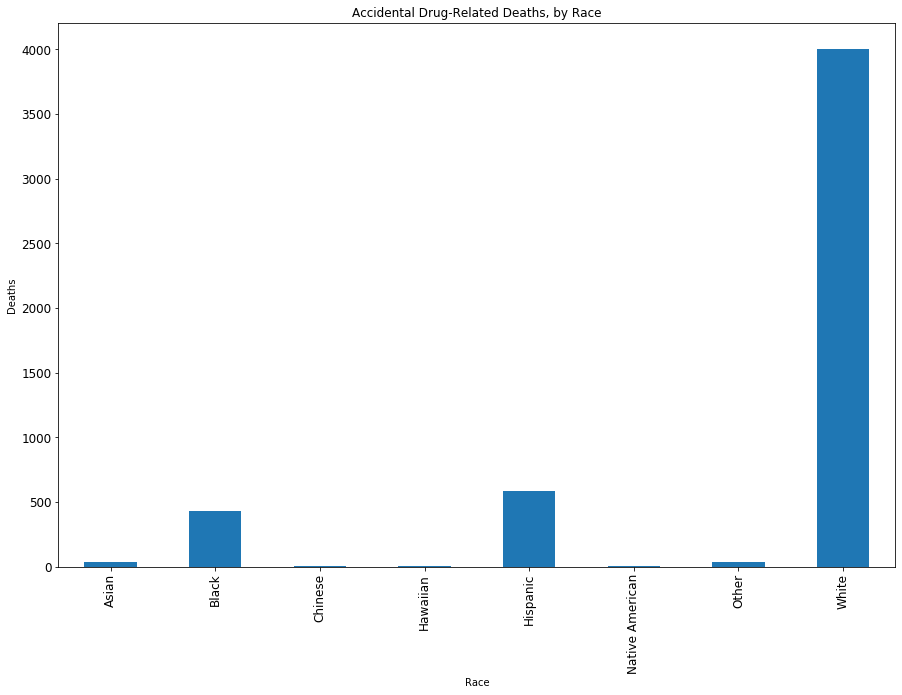

In [40]:
# Bar graph of Accidental Drug-related Deaths by Race
ax = grouped_race_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Race", figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel("Race")
plt.ylabel("Deaths")
plt.show()

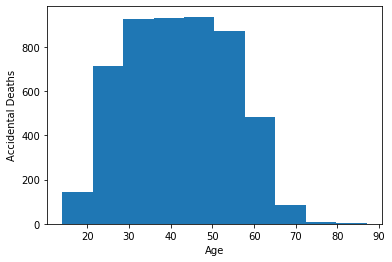

In [41]:
# Histogram of Accidental Deaths by Age
Agedeaths = narrowed_df["Age"]

plt.hist(Agedeaths)
plt.xlabel("Age")
plt.ylabel("Accidental Deaths")
plt.show()

In [42]:
# Create age groups (0-under 25, 25-40, 41-65, over 65)
bins = [-1, 25, 41, 66, 199]
AgeGroups = ['Under 25','25-40','41-65','over 65']

#Place data series into new column in dataframe
narrowed_df["Age Group"] = pd.cut(narrowed_df["Age"], bins, labels=AgeGroups)
narrowed_df.head()

grouped_AgeGroup_df = narrowed_df.groupby(["Age Group"]).agg({'ID':'count'})
grouped_AgeGroup_df.head(10)

,ID
Age Group,
Under 25,503
25-40,2006
41-65,2522
over 65,71


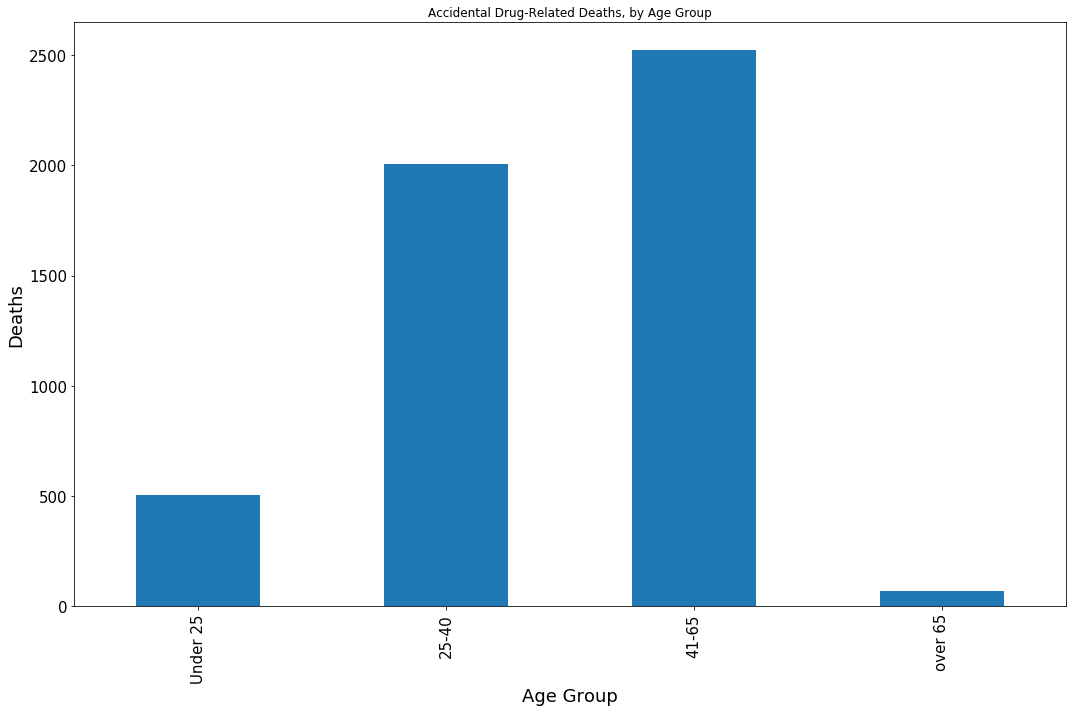

In [44]:
# Accidental Drug-related deaths by Age Groups
ax = grouped_AgeGroup_df.plot(kind='bar', title ="Accidental Drug-Related Deaths, by Age Group", figsize=(15, 10), legend=False, fontsize=15)
plt.xlabel("Age Group", fontsize=18)
plt.ylabel("Deaths", fontsize=18)
plt.tight_layout()
plt.show()

### Daniel - Drugs Related Deaths by City